# Root Locus

## Inductino machine dynamics:
$
p\left[ \begin{array}{c}
	i_s\\
	\psi _{\mu}\\
\end{array} \right] =\left[ \begin{matrix}
	\frac{1}{L_{\sigma}}\left( -r_s-r_{req} \right) I&		\frac{1}{L_{\sigma}}\alpha I-\omega J\\
	r_{req}I&		-\alpha I+\omega J\\
\end{matrix} \right] \left[ \begin{array}{c}
	i_s\\
	\psi _{\mu}\\
\end{array} \right] +\left[ \begin{array}{c}
	\frac{1}{L_{\sigma}}I\\
	0\\
\end{array} \right] u_s
$


In [75]:
%matplotlib inline
from pylab import *
mpl.rcParams['figure.dpi']= 200

from IPython.display import display, Latex
from sympy import *
init_printing(use_latex='mathjax')

# Symbols
I = Identity(2).as_explicit()
I = eye(2)
J = Matrix(2,2,[0,-1,1,0])
display(I, J)

omega = Symbol(r'\omega')
r_s, r_req, L_sigma, L_mu = symbols(r'r_s, r_{req}, L_\sigma, L_\mu')
alpha = r_req / L_mu
p = symbols(r'p')

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

⎡0  -1⎤
⎢     ⎥
⎣1  0 ⎦

In [79]:
A = MatrixSymbol('A', 4, 4)
A = BlockMatrix([[(-r_s-r_req)/L_sigma*I, alpha/L_sigma*I-omega/L_sigma*J], 
                 [r_req*I, -alpha*I+omega*J]])
substitution = {r_s:3, r_req:1.6, L_sigma:0.024, L_mu:0.4, omega:10}
substitution = {r_s:0.208, r_req:0.254, L_sigma:23.5e-3/20, L_mu:23.5e-3*19/20, omega:10} # 1993-Yang.Chin-Adaptive
print(substitution)
display(A, A.subs(substitution))

# Option 1: roots
# factor(A.as_explicit().subs(substitution).charpoly(p))
display(A.as_explicit().subs(substitution).charpoly(p))
# https://github.com/sympy/sympy/issues/14982
# roots(mat.charpoly(simplify=fu))
print('-'*40, '\nOPTION I')
display(roots(A.as_explicit().subs(substitution).charpoly(p)))
for k, y in roots(A.as_explicit().subs(substitution).charpoly(p)).items():
    print(k, y)
print(type(k))

# Option 2: eigenvalues
print('-'*40, '\nOPTION II')
display(A.as_explicit().subs(substitution).eigenvals())
for k, y in A.as_explicit().subs(substitution).eigenvals().items():
    print(k, y)
print(type(k))

{r_s: 0.208, r_{req}: 0.254, L_\sigma: 0.001175, L_\mu: 0.022325, \omega: 10}


⎡⎡-rₛ - r_{req}               ⎤  ⎡   r_{req}          \omega    ⎤⎤
⎢⎢─────────────        0      ⎥  ⎢──────────────     ────────   ⎥⎥
⎢⎢   L_\sigma                 ⎥  ⎢L_\mu⋅L_\sigma     L_\sigma   ⎥⎥
⎢⎢                            ⎥  ⎢                              ⎥⎥
⎢⎢               -rₛ - r_{req}⎥  ⎢   -\omega         r_{req}    ⎥⎥
⎢⎢      0        ─────────────⎥  ⎢   ────────     ──────────────⎥⎥
⎢⎣                  L_\sigma  ⎦  ⎣   L_\sigma     L_\mu⋅L_\sigma⎦⎥
⎢                                                                ⎥
⎢                                     ⎡-r_{req}            ⎤     ⎥
⎢                                     ⎢─────────   -\omega ⎥     ⎥
⎢      ⎡r_{req}     0   ⎤             ⎢  L_\mu             ⎥     ⎥
⎢      ⎢                ⎥             ⎢                    ⎥     ⎥
⎢      ⎣   0     r_{req}⎦             ⎢           -r_{req} ⎥     ⎥
⎢                                     ⎢ \omega    ─────────⎥     ⎥
⎣                                     ⎣             L_\mu  ⎦  

⎡⎡-393.191489361702          0        ⎤  ⎡9682.87627171142   8510.63829787234⎤
⎢⎢                                    ⎥  ⎢                                   ⎥
⎢⎣        0          -393.191489361702⎦  ⎣-8510.63829787234  9682.87627171142⎦
⎢                                                                             
⎢            ⎡0.254    0  ⎤              ⎡-11.3773796192609         -10       
⎢            ⎢            ⎥              ⎢                                    
⎣            ⎣  0    0.254⎦              ⎣       10          -11.3773796192609

 ⎤
 ⎥
 ⎥
 ⎥
⎤⎥
⎥⎥
⎦⎦

PurePoly(1.0*p**4 + 809.137737961926*p**3 + 167804.046277568*p**2 + 1665038.62
083837*p + 7190003.36769324, p, domain='RR')

---------------------------------------- 
OPTION I


{-399.46547960246 - 5.6406081750998⋅ⅈ: 1, -399.46547960246 + 5.6406081750998⋅ⅈ
: 1, -5.10338937850343 - 4.35939182489904⋅ⅈ: 1, -5.10338937850343 + 4.35939182
489904⋅ⅈ: 1}

-399.46547960246 - 5.6406081750998*I 1
-399.46547960246 + 5.6406081750998*I 1
-5.10338937850343 - 4.35939182489904*I 1
-5.10338937850343 + 4.35939182489904*I 1
<class 'sympy.core.add.Add'>
---------------------------------------- 
OPTION II


⎧                               ______________________________________________
⎪  4045688689809629            ╱ 15551981669047165843417858696921   1263157894
⎨- ──────────────── - 5⋅ⅈ -   ╱  ──────────────────────────────── + ──────────
⎪   20000000000000          ╲╱     400000000000000000000000000         5000000
⎩                                                                             

__________                                    ________________________________
7368443⋅ⅈ        4045688689809629            ╱ 1555198166904716584341785869692
───────── : 1, - ──────────────── - 5⋅ⅈ +   ╱  ───────────────────────────────
0000000           20000000000000          ╲╱     400000000000000000000000000  
                                                                              

________________________                              ________________________
1   12631578947368443⋅ⅈ        4045688689809629      ╱ 15551981669047165843417
─ + ─────────────────── : 1, - ──────────────── - 

-4045688689809629/20000000000000 - sqrt(15551981669047165843417858696921/400000000000000000000000000 - 12631578947368443*I/50000000000000) + 5*I 1
-4045688689809629/20000000000000 - 5*I - sqrt(15551981669047165843417858696921/400000000000000000000000000 + 12631578947368443*I/50000000000000) 1
-4045688689809629/20000000000000 - 5*I + sqrt(15551981669047165843417858696921/400000000000000000000000000 + 12631578947368443*I/50000000000000) 1
-4045688689809629/20000000000000 + sqrt(15551981669047165843417858696921/400000000000000000000000000 - 12631578947368443*I/50000000000000) + 5*I 1
<class 'sympy.core.add.Add'>


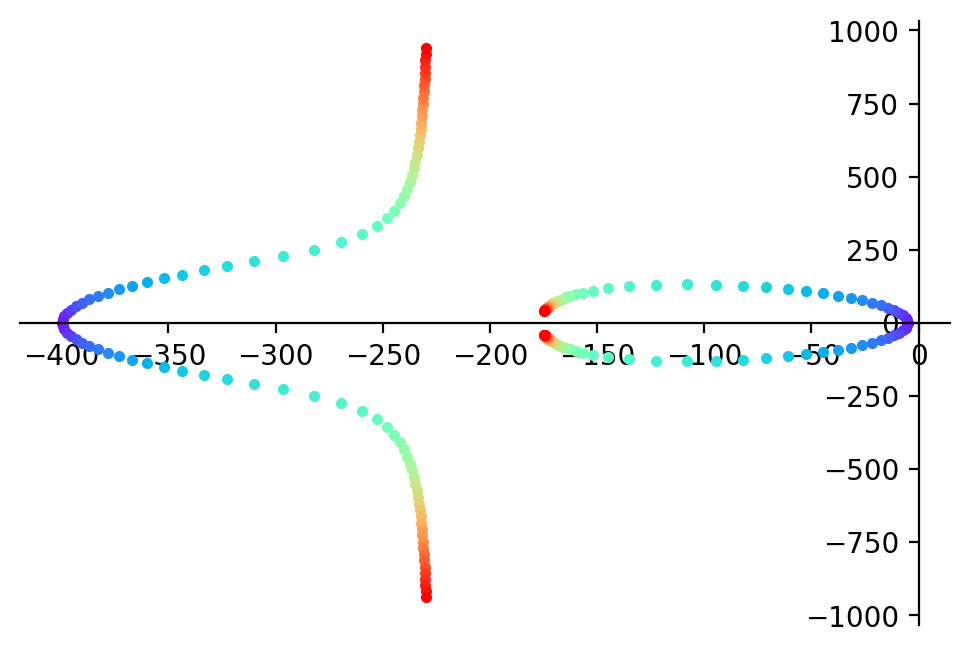

In [80]:
ax = figure().gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')

omega_range = arange(0, 1000, 20)
colors = cm.rainbow(np.linspace(0, 1, len(omega_range)))
for omega_value, c in zip(omega_range, colors):
    substitution[omega] = omega_value
    for k, y in A.as_explicit().subs(substitution).eigenvals().items():
        ax.plot(complex(k).real, complex(k).imag, 'k.', color=c)
